In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/retail_sales.csv')

In [2]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Transaction ID,1,2,3,4,5,6,7,8,9,10
Date,2023-11-24,2023-02-27,2023-01-13,2023-05-21,2023-05-06,2023-04-25,2023-03-13,2023-02-22,2023-12-13,2023-10-07
Customer ID,CUST001,CUST002,CUST003,CUST004,CUST005,CUST006,CUST007,CUST008,CUST009,CUST010
Gender,Male,Female,Male,Male,Male,Female,Male,Male,Male,Female
Age,34,26,50,37,30,45,46,30,63,52
Product Category,Beauty,Clothing,Electronics,Clothing,Beauty,Beauty,Clothing,Electronics,Electronics,Clothing
Quantity,3,2,1,1,2,1,2,4,2,4
Price per Unit,50,500,30,500,50,30,25,25,300,50
Total Amount,150,1000,30,500,100,30,50,100,600,200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
#convertir columnas a numeros
col_numeric =  ['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount',]

for i in col_numeric:
    df[i] = pd.to_numeric(df[i], errors='coerce')

# convertir a fecha

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


# convertir a categorias

col_categorias = [ 'Customer ID', 'Gender', 'Product Category',]

for i in col_categorias:
    df[i] = df[i].astype('category')  


print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   category      
 3   Gender            1000 non-null   category      
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   category      
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: category(3), datetime64[ns](1), int64(5)
memory usage: 91.3 KB
None


In [5]:
print(df['Product Category'].value_counts())

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


In [6]:
print(df['Product Category'].unique())

['Beauty', 'Clothing', 'Electronics']
Categories (3, object): ['Beauty', 'Clothing', 'Electronics']


7.1. Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.

In [7]:
print(df.describe())

       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000000    900.000000  
max 

8.1. Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.

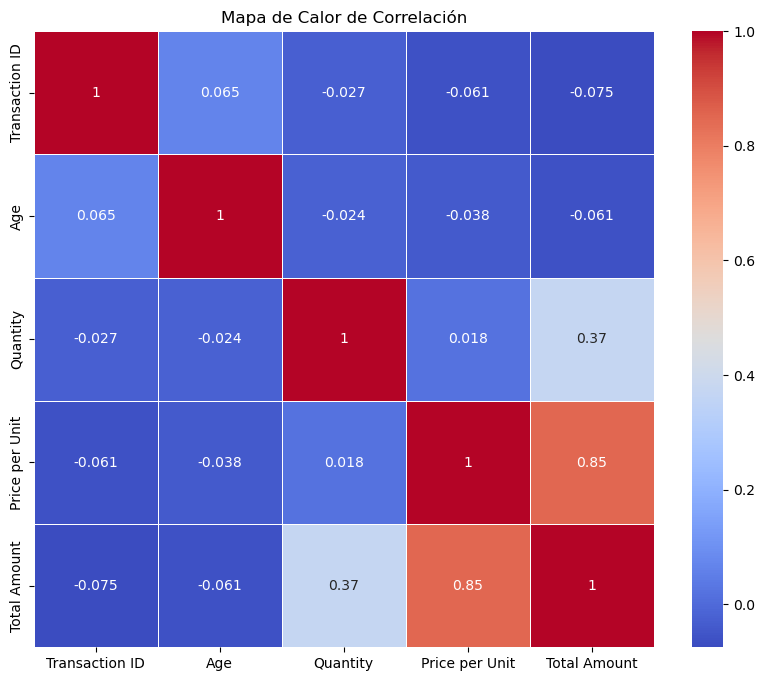

In [12]:
# Seleccionar solo las columnas numéricas para calcular la matriz de correlación
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()


8.2. Crea subplots para comparar diferentes variables clave.

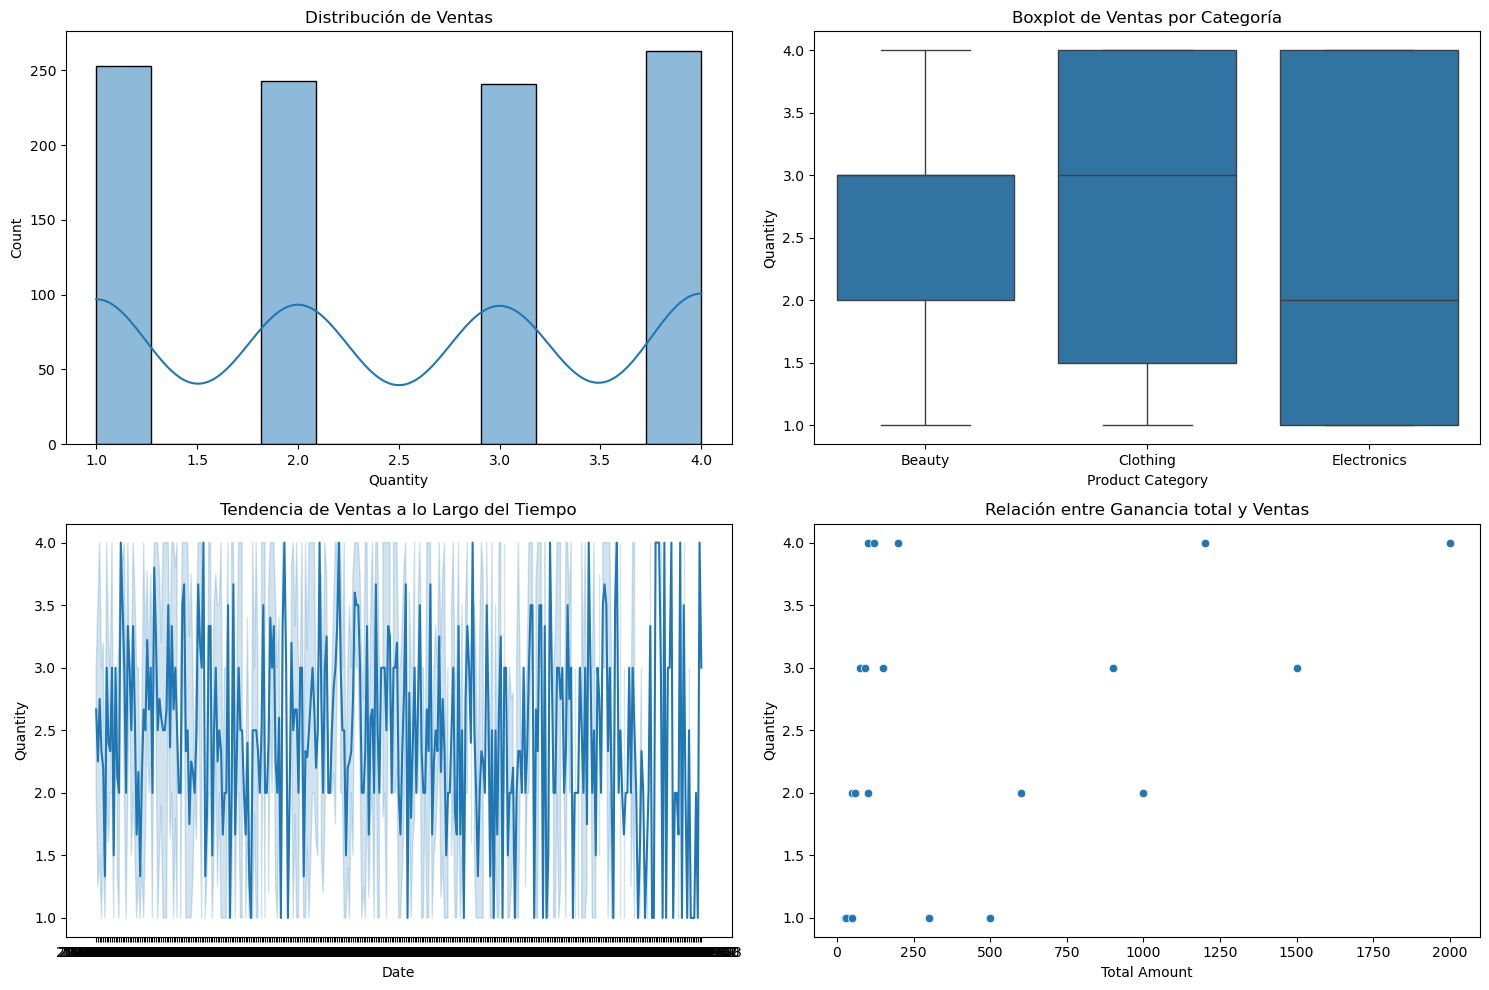

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(df['Quantity'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribución de Ventas')

sns.boxplot(x='Product Category', y='Quantity', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot de Ventas por Categoría')

sns.lineplot(x='Date', y='Quantity', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Tendencia de Ventas a lo Largo del Tiempo')

sns.scatterplot(x='Total Amount', y='Quantity', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Relación entre Ganancia total y Ventas')

plt.tight_layout()
plt.show()


8.3. Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información.

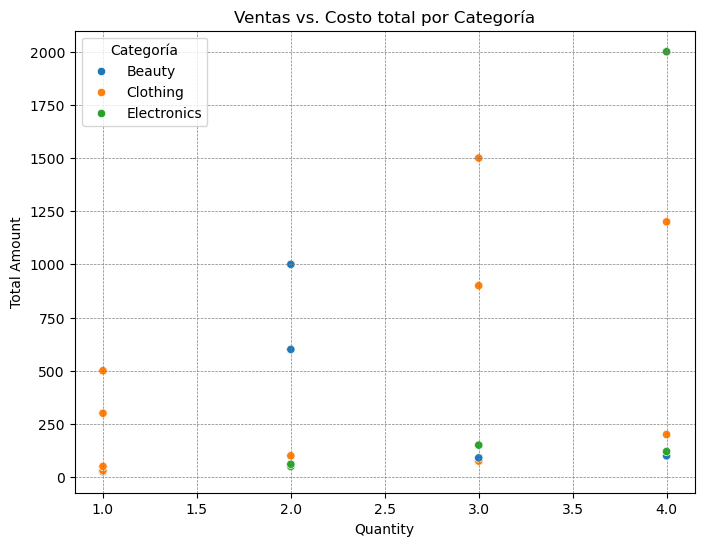

In [14]:
# Ejemplo con cuadrícula y anotación en el gráfico de dispersión
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x='Quantity', y='Total Amount', hue='Product Category', ax=ax)
ax.set_title('Ventas vs. Costo total por Categoría')
ax.grid(True, linestyle='--', color='gray', linewidth=0.5)
ax.legend(title='Categoría')

# Anotación de un punto importante y una flecha
ax.annotate('Máyor venta', xy=(df['Total Amount'].max(), df['Total Amount'].max()), 
            xytext=(df['Quantity'].max() - 10, df['Total Amount'].max() + 5),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()


In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Seleccionar las columnas relevantes como características
X = df[['Product Category', 'Quantity', 'Price per Unit' ]]  # Ajusta según tu dataset
y = df['Total Amount']  # La variable objetivo (target)

transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Total Amount', 'Quantity']),
        ('cat', OneHotEncoder(), ['Product Category'])
    ]
)


In [22]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('preprocessor', transformer)
])
X_processed = pipeline.fit_transform(X)


ValueError: A given column is not a column of the dataframe